In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyvista as pv 
import pandas as pd

In [93]:
mesh = pv.read("/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/16.obj")

In [94]:
qual = mesh.compute_cell_quality(quality_measure='scaled_jacobian')
qual

PolyData (0x3189ce080)
  N Cells:    51446
  N Points:   25703
  N Strips:   0
  X Bounds:   -3.917e+01, 6.733e+01
  Y Bounds:   -1.634e+02, 1.682e+01
  Z Bounds:   -1.060e-14, 6.250e+01
  N Arrays:   6

/Users/User/Documents/Project_JEB/.venv/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


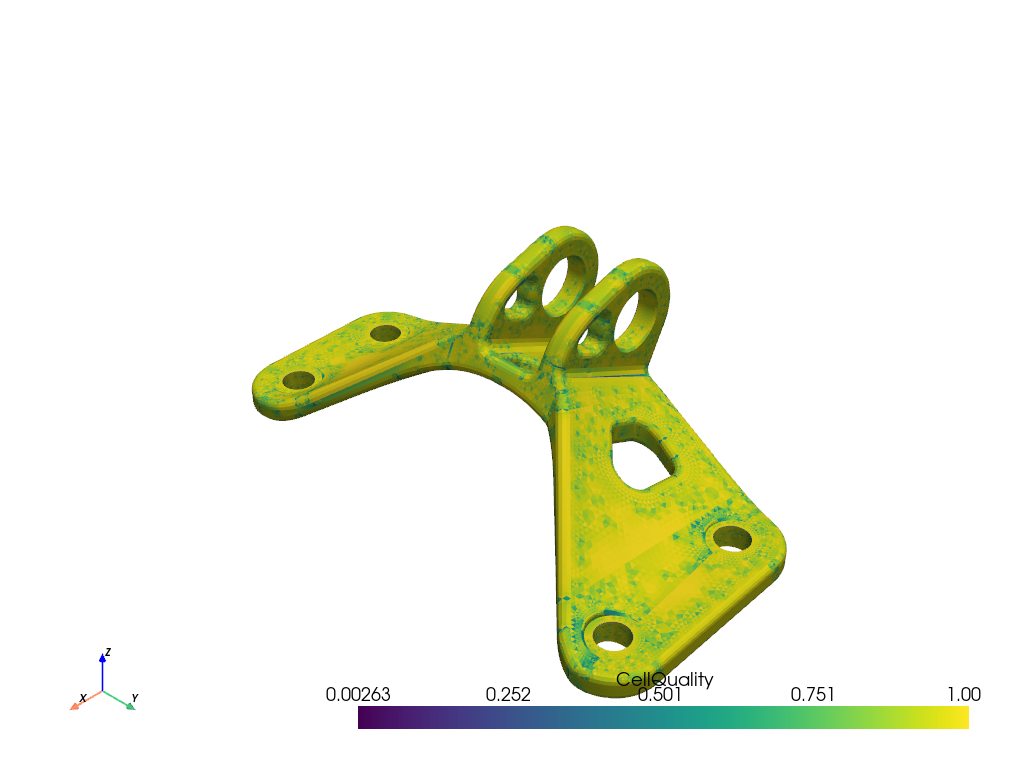

In [95]:
qual.plot(scalars='CellQuality')

In [77]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/working_table.csv')
cad_data.head(10)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_hor_magdisp,max_dia_magdisp,max_tor_magdisp,category,num_tets,mass,density,principal_str1,principal_str2,VM_stress
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.321826,0.239873,0.165667,0.174951,block,570111,1.375163,0.000004,659.877164,413.029336,578.325069
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1.000106,0.611791,0.399737,beam,431759,0.464950,0.000004,1062.370300,903.485300,993.165361
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,0.965408,3.761250,0.495712,block,314815,0.514034,0.000004,4824.582762,1664.634238,4244.898019
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1.608428,0.375712,0.583333,beam,293971,0.399288,0.000004,1016.793306,949.083394,985.716598
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1.880950,0.787904,0.604398,beam,481030,0.350834,0.000004,1926.024972,1671.480028,1812.893841
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,0.828652,0.466578,0.396167,block,401725,0.401942,0.000004,791.231281,604.862219,717.993341
6,12,45862,91792,164079.852787,46607.652241,0.999295,18.0,0.747508,0.764234,0.201657,0.271566,butterfly,625048,0.733437,0.000004,1852.238956,1131.954044,1617.647637
7,14,39157,78710,211506.440657,61185.846161,1.286912,100.0,1.168271,0.933708,0.376460,0.202286,butterfly,469738,0.945434,0.000004,1331.149001,764.307799,1157.485946
8,15,20730,41484,129481.087600,48599.391540,1.604276,7.0,0.660283,0.677615,0.299637,0.232274,beam,224221,0.578780,0.000004,839.947547,641.808853,761.156241
9,16,25703,51446,98714.938654,32239.874929,1.156889,11.0,1.327584,1.026911,0.573472,0.373200,flat,303819,0.441256,0.000004,1762.591913,1248.884087,1570.652478
